In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

def sm(x):
  return K.abs(x)*K.sigmoid(30*(x+0.5))*K.tanh(5*x)

def sm2(x):
  return 0.5*K.abs(x)*(K.tanh(x)+0.98)

def sm3(x):
  return x*K.sigmoid(80*(x+1))*K.tanh(x)*2

def sm4(x):
  return x*K.sigmoid(20*(x+1))*K.tanh(x)*K.tanh(10*(x+0.2))

def sm5(x):
  return 0.5*x*(K.tanh(100*x-1)+1.02)
get_custom_objects().update({'ca': Activation(sm)})

In [2]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

In [3]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 4, 
                           kernel_size = (3,3), 
                           activation = 'ca',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 8, 
                           kernel_size = (3,3), 
                           activation = 'ca',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 16, activation = 'ca'),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
model.fit(train_x, train_y, batch_size = 100, epochs = 5)
test_loss, test_acc = model.evaluate(test_x, test_y)

Epoch 1/5
600/600 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.8445
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.1933 - accuracy: 0.9469
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9621
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9699
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9751


1/1 [==============================] - 0s 15ms/step


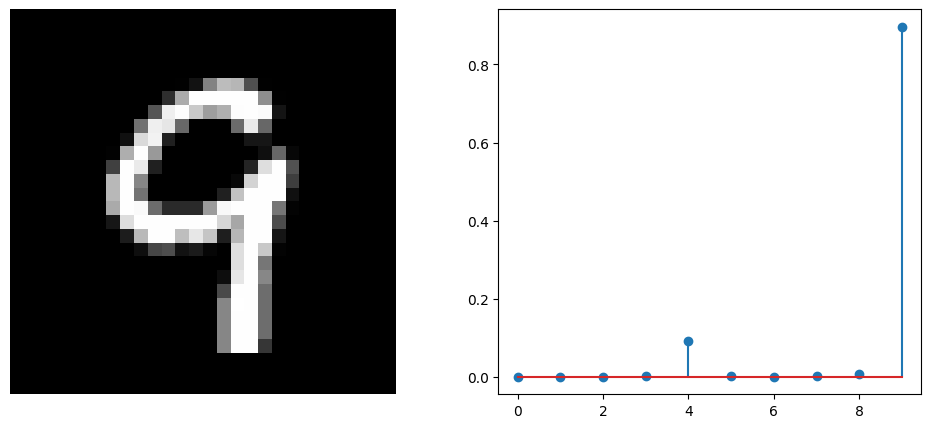

Prediction : 9


In [21]:
test_img = test_x[[150]]

predict = model.predict(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))